In [149]:
#Author: Christine Nguyen

#Data Cleaning and Preprocessing: the purpose of this step is to remove any outliers/noise from the data set, and to also 
#preprocess the data in a way for model consumption. Here we focus on removing missing data/imputing missing data 
#dependent on the proportion. For preprocessing, that means turning the categorical variables into "cat" data types,
#as well as scaling the data to prevent smaller scaled variables being muted by larger scaled varaibles. 

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [314]:
sales = pd.read_pickle('sales_reduced_columns.pkl')  

In [167]:
sales.head()

,CoolingYN,FireplaceYN,HighSchoolDistrict,LaundryYN,MLSAreaMajor,PoolPrivateYN,SignOnPropertyYN,ViewYN,quantile_closePrice,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
0,1.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,"(1175000.0, 1275000.0]",2,1225000.0,NaN,2,1615.0,1955.0,7.572011e+09
1,0.0,1.0,NaN,NaN,NaN,0.0,0.0,1.0,"(1275000.0, 1400000.0]",2,1285000.0,NaN,20,1800.0,1949.0,7.572008e+09
2,0.0,1.0,NaN,1.0,NaN,0.0,0.0,NaN,"(1275000.0, 1400000.0]",2,1300000.0,4.0,0,1890.0,1959.0,7.578015e+09
3,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,"(1400000.0, 1580040.0]",3,1432500.0,3.0,31,2451.0,1961.0,7.574002e+09
4,0.0,1.0,NaN,NaN,NaN,0.0,1.0,1.0,"(1400000.0, 1580040.0]",3,1455000.0,2.0,32,1921.0,1960.0,7.564011e+09


In [393]:
numerical = [
'BathroomsTotalInteger',
'PhotosCount',
# 'ClosePrice',
'LivingArea',
'YearBuilt',
'ParkingTotal'
]

categorical =[
# 'quantile_closePrice',
'MLSAreaMajor',
'ViewYN',
'FireplaceYN',
'LaundryYN',
'CoolingYN',
'HighSchoolDistrict',
'PoolPrivateYN',
'SignOnPropertyYN'
]

# Clean continous variables

In [316]:
sales.describe()

#notes
#BathroomsTotalIntege - maximum is 10
#ClosePrice - there is a house with a max price of 1.25 x 10^7 and minimum price of 0
#ParkingTotal - house with 33 parking slots
#Living area - minimum living space of 0 and maximum space os 12K

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4503.000000,5401.000000,4744.000000,4132.000000,3970.000000,5411.000000,5450.000000,5.449000e+03,3605.000000,5450.000000,5447.000000,5442.000000,5.445000e+03
mean,0.540751,0.960378,0.956366,0.218780,0.851134,0.803733,2.956147,1.334801e+06,2.557836,20.703303,2588.637599,1966.782249,8.959779e+09
std,0.498392,0.195088,0.204301,0.413469,0.356002,0.397209,1.163187,7.555132e+05,1.494272,14.687890,1168.287689,12.990821,1.026484e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1853.500000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2317.000000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.475000e+06,3.000000,30.000000,2925.000000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.250000e+07,33.000000,75.000000,12841.000000,2020.000000,7.582021e+12


In [317]:
percent_missing = sales.isnull().sum() * 100 / len(sales)
missing_value_df = pd.DataFrame({'column_name': sales.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)
missing_value_df.sort_values('percent_missing', inplace = True)

In [318]:
missing_value_df

,column_name,percent_missing
8,quantile_closePrice,0.000000
9,BathroomsTotalInteger,0.000000
12,PhotosCount,0.000000
10,ClosePrice,0.018349
13,LivingArea,0.055046
15,ParcelNumber,0.091743
14,YearBuilt,0.146789
4,MLSAreaMajor,0.293578
7,ViewYN,0.715596
1,FireplaceYN,0.899083


In [275]:
import matplotlib.pyplot as plt 
import seaborn as sns

c:\users\cnguyen\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\cnguyen\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


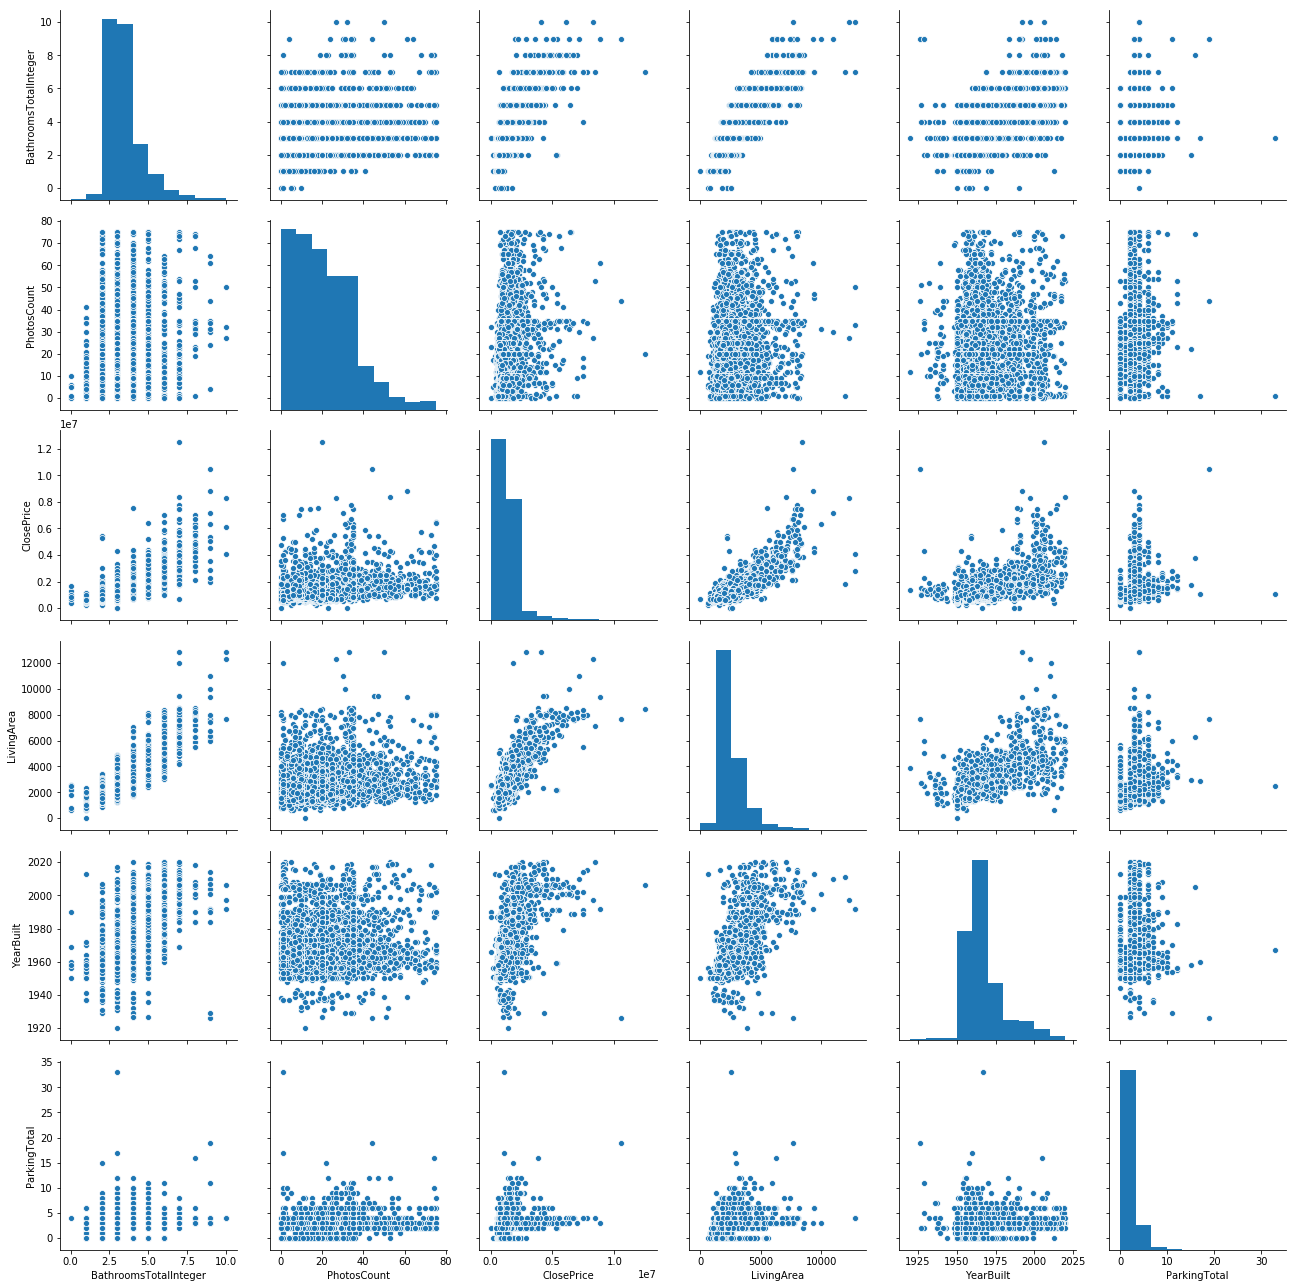

In [22]:
#see distribution of each continous variable
sns.pairplot(sales[numerical], height = 3)
plt.show()

In [49]:
#let's clean the BathroomTotalInteger variable first. Recall that the BathroomsTotalInteger did not contain any missing data points; 
#I will be removing outliers using interquantile ranges or IQR.
# IQR = Q3 − Q1.

In [319]:
#dropping some data with less than 1% of missing data... 
sales.dropna(subset = ['ClosePrice'], inplace = True)
sales.dropna(subset = ['LivingArea'], inplace = True)

In [320]:
#clean BathroomsTotalInteger
q1 = sales.BathroomsTotalInteger.quantile(0.25)
q3 = sales.BathroomsTotalInteger.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(lower_threshold, upper_threshold, round(sales.BathroomsTotalInteger.mean()))
sales.BathroomsTotalInteger.mask((sales.BathroomsTotalInteger < lower_threshold) 
                                 | (sales.BathroomsTotalInteger > upper_threshold), round(sales.BathroomsTotalInteger.mean()), inplace=True)

0.5 4.5 3.0


In [321]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4500.000000,5398.000000,4742.000000,4129.000000,3967.000000,5407.000000,5446.000000,5.446000e+03,3604.000000,5446.000000,5446.000000,5438.000000,5.441000e+03
mean,0.540889,0.960541,0.956348,0.218697,0.851273,0.803588,2.706206,1.335114e+06,2.557991,20.713368,2588.676643,1966.786318,8.960809e+09
std,0.498381,0.194703,0.204342,0.413413,0.355864,0.397320,0.686205,7.555937e+05,1.494451,14.687898,1168.391410,12.991570,1.026862e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1853.250000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2316.500000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.477625e+06,3.000000,30.000000,2925.000000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.250000e+07,33.000000,75.000000,12841.000000,2020.000000,7.582021e+12


In [322]:
#clean ClosePrice
q1 = sales.ClosePrice.quantile(0.25)
q3 = sales.ClosePrice.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(lower_threshold, upper_threshold, round(sales.ClosePrice.mean(),1))

sales.ClosePrice.mask((sales.ClosePrice < lower_threshold) 
                                 | (sales.ClosePrice > upper_threshold), round(sales.ClosePrice.mean(),1), inplace=True)

96062.5 2306562.5 1335113.8


In [323]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4500.000000,5398.000000,4742.000000,4129.000000,3967.000000,5407.000000,5446.000000,5.446000e+03,3604.000000,5446.000000,5446.000000,5438.000000,5.441000e+03
mean,0.540889,0.960541,0.956348,0.218697,0.851273,0.803588,2.706206,1.200387e+06,2.557991,20.713368,2588.676643,1966.786318,8.960809e+09
std,0.498381,0.194703,0.204342,0.413413,0.355864,0.397320,0.686205,3.576191e+05,1.494451,14.687898,1168.391410,12.991570,1.026862e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,0.000000,0.000000,0.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1853.250000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2316.500000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.386299e+06,3.000000,30.000000,2925.000000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.305000e+06,33.000000,75.000000,12841.000000,2020.000000,7.582021e+12


In [324]:
#clean LivingArea
q1 = sales.LivingArea.quantile(0.25)
q3 = sales.LivingArea.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(lower_threshold, upper_threshold, round(sales.LivingArea.mean(),1))
# sales.loc[(sales.LivingArea < lower_threshold) | (sales.LivingArea > upper_threshold)].shape
sales.LivingArea.mask((sales.LivingArea < lower_threshold) 
                                 | (sales.LivingArea > upper_threshold), round(sales.LivingArea.mean(),1), inplace=True)

245.625 4532.625 2588.7


In [325]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4500.000000,5398.000000,4742.000000,4129.000000,3967.000000,5407.000000,5446.000000,5.446000e+03,3604.000000,5446.000000,5446.000000,5438.000000,5.441000e+03
mean,0.540889,0.960541,0.956348,0.218697,0.851273,0.803588,2.706206,1.200387e+06,2.557991,20.713368,2381.984961,1966.786318,8.960809e+09
std,0.498381,0.194703,0.204342,0.413413,0.355864,0.397320,0.686205,3.576191e+05,1.494451,14.687898,714.062753,12.991570,1.026862e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,0.000000,0.000000,663.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1854.000000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2317.000000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.386299e+06,3.000000,30.000000,2714.500000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.305000e+06,33.000000,75.000000,4530.000000,2020.000000,7.582021e+12


In [326]:
#clean ParkingTotal
q1 = sales.ParkingTotal.quantile(0.25)
q3 = sales.ParkingTotal.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(lower_threshold, upper_threshold, round(sales.ParkingTotal.mean()))
# sales.loc[(sales.ParkingTotal < lower_threshold) | (sales.ParkingTotal > upper_threshold)].shape
sales.ParkingTotal.mask((sales.ParkingTotal < lower_threshold) 
                                 | (sales.ParkingTotal > upper_threshold), round(sales.ParkingTotal.mean()), inplace=True)

0.5 4.5 3.0


In [327]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4500.000000,5398.000000,4742.000000,4129.000000,3967.000000,5407.000000,5446.000000,5.446000e+03,3604.000000,5446.000000,5446.000000,5438.000000,5.441000e+03
mean,0.540889,0.960541,0.956348,0.218697,0.851273,0.803588,2.706206,1.200387e+06,2.446171,20.713368,2381.984961,1966.786318,8.960809e+09
std,0.498381,0.194703,0.204342,0.413413,0.355864,0.397320,0.686205,3.576191e+05,0.650062,14.687898,714.062753,12.991570,1.026862e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,1.000000,0.000000,663.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1854.000000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2317.000000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.386299e+06,3.000000,30.000000,2714.500000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.305000e+06,4.000000,75.000000,4530.000000,2020.000000,7.582021e+12


In [328]:
#clean PhotosCount
q1 = sales.PhotosCount.quantile(0.25)
q3 = sales.PhotosCount.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(lower_threshold, upper_threshold, round(sales.PhotosCount.mean()))
# sales.loc[(sales.PhotosCount < lower_threshold) | (sales.PhotosCount > upper_threshold)].shape
sales.PhotosCount.mask((sales.PhotosCount < lower_threshold) 
                                 | (sales.PhotosCount > upper_threshold), round(sales.PhotosCount.mean()), inplace=True)

-22.5 61.5 21.0


In [329]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,4500.000000,5398.000000,4742.000000,4129.000000,3967.000000,5407.000000,5446.000000,5.446000e+03,3604.000000,5446.000000,5446.000000,5438.000000,5.441000e+03
mean,0.540889,0.960541,0.956348,0.218697,0.851273,0.803588,2.706206,1.200387e+06,2.446171,19.940874,2381.984961,1966.786318,8.960809e+09
std,0.498381,0.194703,0.204342,0.413413,0.355864,0.397320,0.686205,3.576191e+05,0.650062,13.305529,714.062753,12.991570,1.026862e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,1.000000,0.000000,663.000000,1920.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.250000e+05,2.000000,9.000000,1854.000000,1959.000000,7.558001e+09
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.175000e+06,2.000000,19.000000,2317.000000,1963.000000,7.574013e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.386299e+06,3.000000,29.000000,2714.500000,1970.000000,7.583003e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.305000e+06,4.000000,61.000000,4530.000000,2020.000000,7.582021e+12


c:\users\cnguyen\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\cnguyen\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


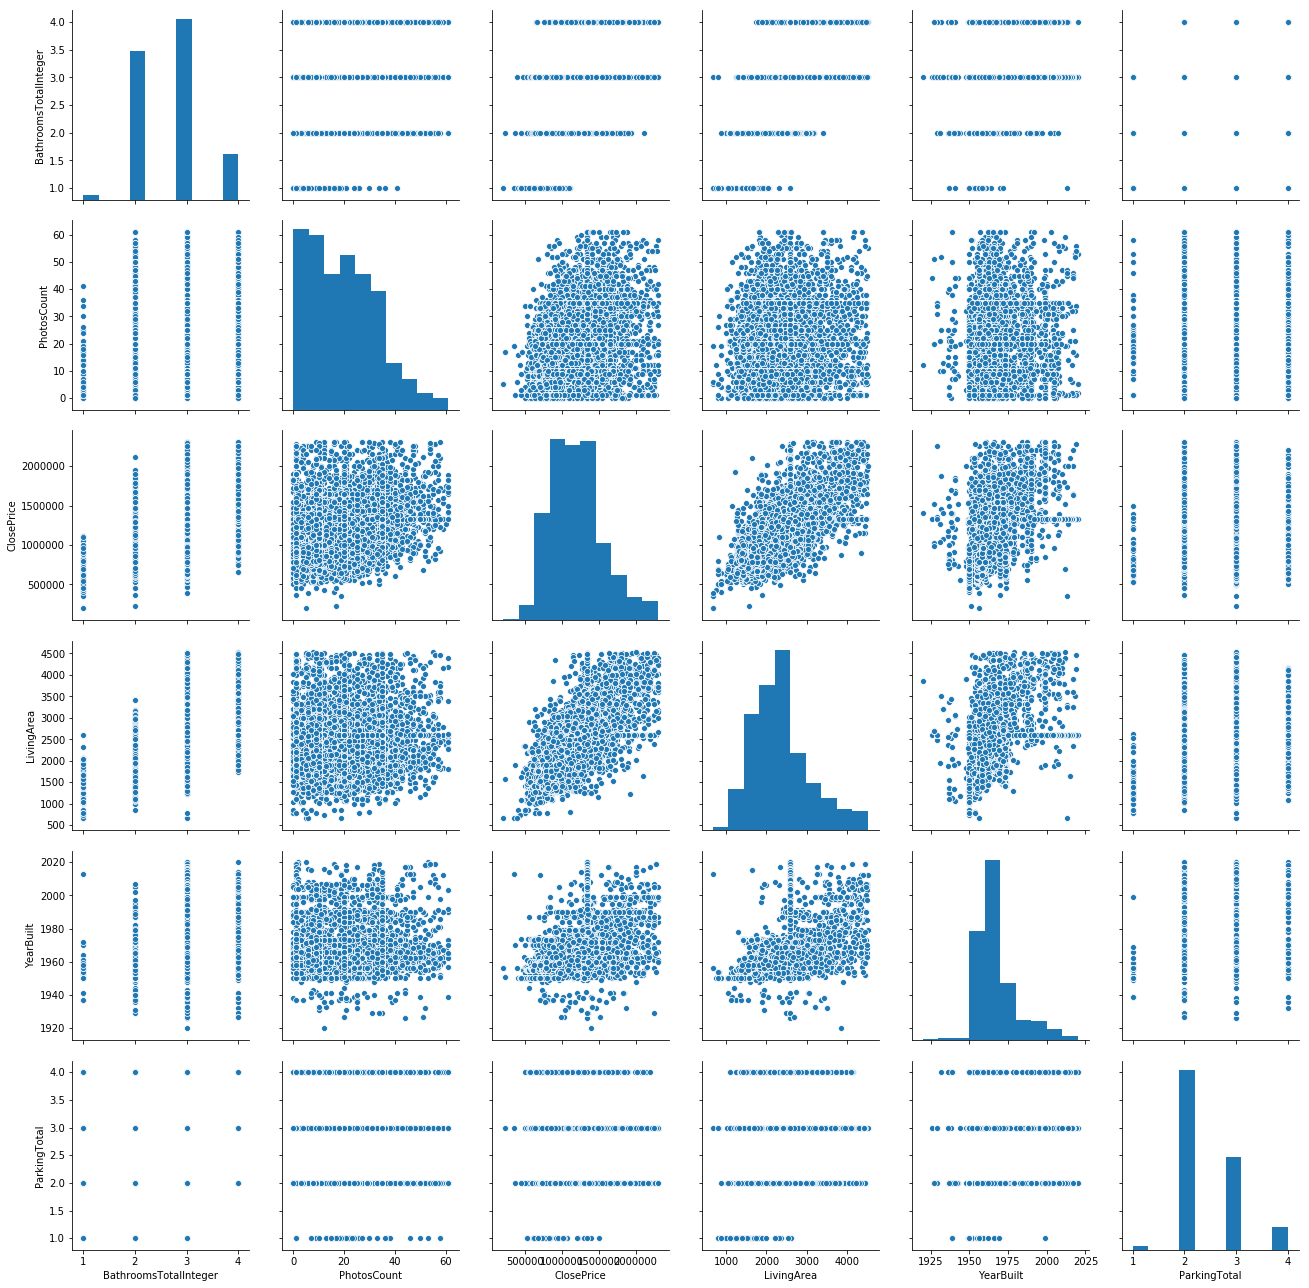

In [276]:
sns.pairplot(sales[numerical], height = 3)
plt.show()

In [330]:
percent_missing = sales.isnull().sum() * 100 / len(sales)
missing_value_df = pd.DataFrame({'column_name': sales.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)
missing_value_df.sort_values('percent_missing', inplace = True)

In [331]:
missing_value_df

,column_name,percent_missing
8,quantile_closePrice,0.000000
9,BathroomsTotalInteger,0.000000
10,ClosePrice,0.000000
12,PhotosCount,0.000000
13,LivingArea,0.000000
15,ParcelNumber,0.091811
14,YearBuilt,0.146897
4,MLSAreaMajor,0.293794
7,ViewYN,0.716122
1,FireplaceYN,0.881381


In [337]:
#we still need to take care of the year; a litle over 14% of the data is missing. I will be using a simple imputer to impute the missing values
from sklearn.impute import SimpleImputer
import numpy as np

In [339]:
#clean YearBuilt
#removing houses that pass the lower/upper thresholds due to proportion of the data, that means 10% of the data will be cut


q1 = sales.YearBuilt.quantile(0.25)
q3 = sales.YearBuilt.quantile(0.75)

iqr = q3 - q1

lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# print(lower_threshold, upper_threshold, round(sales.YearBuilt.mean()))

sales = sales.loc[~((sales.YearBuilt < lower_threshold) | (sales.YearBuilt > upper_threshold))].copy()
# sales.loc[~((sales.YearBuilt < lower_threshold) | (sales.YearBuilt > upper_threshold))]
# sales.loc[(sales.YearBuilt < lower_threshold) | (sales.YearBuilt > upper_threshold)].shape
# sales.PhotosCount.mask((sales.PhotosCount < lower_threshold) 
#                                  | (sales.PhotosCount > upper_threshold), round(sales.PhotosCount.mean()), inplace=True)

In [340]:
#there is still missing data, so we will go ahead an impute the year with the median value
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(sales[['YearBuilt']])
sales['YearBuilt'] = imp_median.transform(sales[['YearBuilt']]).ravel()

In [343]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,3993.000000,4790.000000,4208.000000,3681.000000,3536.000000,4795.000000,4828.000000,4.828000e+03,3201.000000,4828.000000,4828.000000,4828.000000,4.825000e+03
mean,0.499123,0.958246,0.954848,0.200489,0.858597,0.791658,2.640224,1.158387e+06,2.394564,19.609362,2288.548550,1963.472245,9.137919e+09
std,0.500062,0.200047,0.207662,0.400421,0.348486,0.406165,0.672042,3.348716e+05,0.633114,13.113165,653.445435,7.106507,1.090442e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,1.000000,0.000000,663.000000,1943.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.000000e+05,2.000000,9.000000,1816.000000,1959.000000,7.557027e+09
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.125000e+06,2.000000,19.000000,2209.500000,1963.000000,7.574012e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.351062e+06,3.000000,29.000000,2621.250000,1967.000000,7.583010e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.300000e+06,4.000000,61.000000,4530.000000,1986.000000,7.582021e+12


In [346]:
# sales.to_pickle('sales_cleaned_continuous')

In [348]:
#impute missing data for Parking Total
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_median.fit(round(sales[['ParkingTotal']]))
sales['ParkingTotal'] = imp_median.transform(sales[['ParkingTotal']]).ravel()

In [349]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,3993.000000,4790.000000,4208.000000,3681.000000,3536.000000,4795.000000,4828.000000,4.828000e+03,4828.000000,4828.000000,4828.000000,4828.000000,4.825000e+03
mean,0.499123,0.958246,0.954848,0.200489,0.858597,0.791658,2.640224,1.158387e+06,2.394564,19.609362,2288.548550,1963.472245,9.137919e+09
std,0.500062,0.200047,0.207662,0.400421,0.348486,0.406165,0.672042,3.348716e+05,0.515487,13.113165,653.445435,7.106507,1.090442e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,1.000000,0.000000,663.000000,1943.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.000000e+05,2.000000,9.000000,1816.000000,1959.000000,7.557027e+09
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.125000e+06,2.394564,19.000000,2209.500000,1963.000000,7.574012e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.351062e+06,2.394564,29.000000,2621.250000,1967.000000,7.583010e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.300000e+06,4.000000,61.000000,4530.000000,1986.000000,7.582021e+12


# Clean categorical data

In [350]:
percent_missing = sales.isnull().sum() * 100 / len(sales)
missing_value_df = pd.DataFrame({'column_name': sales.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)
missing_value_df.sort_values('percent_missing', inplace = True)

In [351]:
missing_value_df

,column_name,percent_missing
8,quantile_closePrice,0.000000
9,BathroomsTotalInteger,0.000000
10,ClosePrice,0.000000
11,ParkingTotal,0.000000
12,PhotosCount,0.000000
13,LivingArea,0.000000
14,YearBuilt,0.000000
15,ParcelNumber,0.062138
4,MLSAreaMajor,0.289975
7,ViewYN,0.683513


In [355]:
sales.MLSAreaMajor.unique()

array([nan, '162 - Monte Malaga', '163 - Malaga Cove', '167 - PV Dr East',
       '168 - Mira Catalina', '169 - PV Dr South',
       '170 - West Palos Verdes', '171 - Country Club', '172 - La Cresta',
       '173 - Los Verdes', '174 - Crest', '175 - Peninsula Center',
       '176 - Silver Spur', '177 - Eastview/RPV', '699 - Not Defined',
       '165 - PV Dr North', '193 - San Pedro - North',
       '179 - South Shores'], dtype=object)

In [357]:
sales.MLSAreaMajor.fillna('699 - Not Defined', inplace=True) #filling in the missing data with the '699 - Not Defined' code

In [376]:
#dropping these because there is a very small proportion of the data that is missing...
sales.dropna(subset=['ViewYN'], inplace = True) #dropping rows where the ViewYN is missing data
sales.dropna(subset=['FireplaceYN'], inplace = True) #dropping rows where the ViewYN is missing data

In [378]:
sales.describe()

,CoolingYN,FireplaceYN,LaundryYN,PoolPrivateYN,SignOnPropertyYN,ViewYN,BathroomsTotalInteger,ClosePrice,ParkingTotal,PhotosCount,LivingArea,YearBuilt,ParcelNumber
count,3973.000000,4766.000000,4166.000000,3660.000000,3497.000000,4766.000000,4766.000000,4.766000e+03,4766.000000,4766.000000,4766.000000,4766.000000,4.763000e+03
mean,0.498364,0.958246,0.954633,0.200546,0.859308,0.791230,2.641838,1.159093e+06,2.394083,19.709610,2290.652623,1963.494335,9.157917e+09
std,0.500060,0.200048,0.208133,0.400464,0.347753,0.406473,0.671347,3.355078e+05,0.516287,13.094556,653.469376,7.111130,1.097516e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+05,1.000000,0.000000,663.000000,1943.000000,7.444006e+09
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.000000e+05,2.000000,9.000000,1816.000000,1959.000000,7.557028e+09
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.125000e+06,2.394564,19.000000,2210.000000,1963.000000,7.574012e+09
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.354500e+06,2.394564,29.000000,2627.250000,1967.000000,7.583011e+09
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.300000e+06,4.000000,61.000000,4530.000000,1986.000000,7.582021e+12


In [ ]:
# for simplicity sake, I will be imputing the missing values and giving labels that represent #missingness within the dataset

In [397]:
sales.LaundryYN.fillna('3', inplace=True)

In [398]:
sales.CoolingYN.fillna('3', inplace=True)

In [399]:
sales.HighSchoolDistrict.unique()

array([nan, 'Palos Verdes Peninsula Unified',
       'Palos Verdes / LAUSD â€“ inquire', 'Los Angeles Unified',
       'See Remarks', 'Palm Springs Unified', 'Other',
       'Call Listing Office', 'Los Alamitos Unified',
       'More Than 1 District - Call L/O', 'Val Verde', 'Torrance Unified'],
      dtype=object)

In [400]:
sales.HighSchoolDistrict.fillna('Unknown', inplace=True)

In [402]:
sales.PoolPrivateYN.fillna('3', inplace=True)

In [403]:
sales.SignOnPropertyYN.fillna('3', inplace=True)

In [404]:
percent_missing = sales.isnull().sum() * 100 / len(sales)
missing_value_df = pd.DataFrame({'column_name': sales.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)
missing_value_df.sort_values('percent_missing', inplace = True)

In [405]:
missing_value_df

,column_name,percent_missing
0,CoolingYN,0.000000
1,FireplaceYN,0.000000
2,HighSchoolDistrict,0.000000
3,LaundryYN,0.000000
4,MLSAreaMajor,0.000000
5,PoolPrivateYN,0.000000
6,SignOnPropertyYN,0.000000
7,ViewYN,0.000000
8,quantile_closePrice,0.000000
9,BathroomsTotalInteger,0.000000


In [461]:
# sales.to_pickle('sales_cleaned_data.pkl')